In [88]:
import tensorflow as tf
import os
from pathlib import Path
import urllib.request as req
import numpy as np
from zipfile import ZipFile
import matplotlib.pyplot as plt
import tensorflow as tf

In [89]:
data_URL = "https://download.pytorch.org/tutorial/hymenoptera_data.zip"

In [90]:
def create_dir(Data_dir):
    os.makedirs(Data_dir,exist_ok=True)
    print(f'{Data_dir} created')
Root_dir='hymenoptera_data'

create_dir(Root_dir)

hymenoptera_data created


In [91]:
data_path=os.path.join(Root_dir,"data.zip")

if not os.path.isfile(data_path):
    print("downloading data...")
    filename,headers=req.urlretrieve(data_URL,data_path)
    print(f"filename: {filename} created with info \n{headers}")
else:
    print(f"file is already present")

file is already present


In [92]:


unzip_data_dir=os.path.join(Root_dir,'unzip_data')

In [93]:
from zipfile import ZipFile

unzip_data_dir=os.path.join(Root_dir,'unzip_data')

if not os.path.exists(unzip_data_dir):
    create_dir(unzip_data_dir)
    with ZipFile(data_path) as zip_:
        print(f'data extraction started')
        zip_.extractall(unzip_data_dir)
else:
    print(f'Data already extracted')

Data already extracted


In [94]:
main_data_dir=Path("./hymenoptera_data/unzip_data/hymenoptera_data/train")

In [95]:
main_data_dir

WindowsPath('hymenoptera_data/unzip_data/hymenoptera_data/train')

In [96]:
BATCH_SIZE=32
Image_size=(224,224)


In [97]:
data_gen_kwargs=dict(rescale=1./255,validation_split=0.20)

In [98]:
dataflow_kwargs=dict(target_size=Image_size,batch_size=BATCH_SIZE)

In [99]:
valid_data_gen=tf.keras.preprocessing.image.ImageDataGenerator(**data_gen_kwargs)

In [100]:
valid_dataflow=valid_data_gen.flow_from_directory(main_data_dir,subset='validation'
                                                  ,shuffle=False,**dataflow_kwargs)

Found 48 images belonging to 2 classes.


In [101]:
valid_data_gen=tf.keras.preprocessing.image.ImageDataGenerator(**data_gen_kwargs)
do_data_augmentation=False
if do_data_augmentation:
    train_datagen=tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=40,
    horizontal_flip=True,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,**data_gen_kwargs)
else:
    train_datagen=valid_data_gen

train_dataflow=train_datagen.flow_from_directory(main_data_dir,subset='training',
                                                shuffle=False,**dataflow_kwargs)

Found 196 images belonging to 2 classes.


In [102]:
RGB_IMAGE_SIZE=(224,224,3)

In [103]:
vgg=tf.keras.applications.vgg16.VGG16(
input_shape=RGB_IMAGE_SIZE,
weights='imagenet',
include_top=False)

In [104]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [105]:
for layer in vgg.layers:
    layer.trainable=False
    print(f'{layer.name}:{layer.trainable}')

input_2:False
block1_conv1:False
block1_conv2:False
block1_pool:False
block2_conv1:False
block2_conv2:False
block2_pool:False
block3_conv1:False
block3_conv2:False
block3_conv3:False
block3_pool:False
block4_conv1:False
block4_conv2:False
block4_conv3:False
block4_pool:False
block5_conv1:False
block5_conv2:False
block5_conv3:False
block5_pool:False


In [106]:
vgg.output

<KerasTensor: shape=(None, 7, 7, 512) dtype=float32 (created by layer 'block5_pool')>

In [107]:
CLASSES=2

x=tf.keras.layers.Flatten()(vgg.output)
prediction=tf.keras.layers.Dense(CLASSES,activation='softmax')(x)

In [108]:
model=tf.keras.models.Model(inputs=vgg.input,outputs=prediction)

In [109]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [110]:
model.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.01,momentum=0.9),
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=["accuracy"]
)

In [111]:
epochs=10

history=model.fit(train_dataflow,epochs=epochs,validation_data=valid_dataflow,
                 )

Epoch 1/10
7/7 [==============================] - 27s 4s/step - loss: 78.4340 - accuracy: 0.3571 - val_loss: 154.6603 - val_accuracy: 0.5000
Epoch 2/10
7/7 [==============================] - 27s 4s/step - loss: 166.0035 - accuracy: 0.2500 - val_loss: 92.2357 - val_accuracy: 0.5000
Epoch 3/10
7/7 [==============================] - 27s 4s/step - loss: 264.7963 - accuracy: 0.4949 - val_loss: 144.3752 - val_accuracy: 0.5000
Epoch 4/10
7/7 [==============================] - 26s 4s/step - loss: 160.2182 - accuracy: 0.5051 - val_loss: 101.6691 - val_accuracy: 0.5000
Epoch 5/10
7/7 [==============================] - 26s 4s/step - loss: 127.3212 - accuracy: 0.5408 - val_loss: 47.2886 - val_accuracy: 0.5625
Epoch 6/10
7/7 [==============================] - 27s 4s/step - loss: 27.8158 - accuracy: 0.7959 - val_loss: 38.2299 - val_accuracy: 0.6458
Epoch 7/10
7/7 [==============================] - 27s 4s/step - loss: 19.0008 - accuracy: 0.7755 - val_loss: 6.1801 - val_accuracy: 0.8750
Epoch 8/10
7/7

In [112]:
model.save('trained_model.h5')

In [120]:
test_img=plt.imread("hymenoptera_data/unzip_data/hymenoptera_data/val/bees/54736755_c057723f64.jpg")

In [121]:
label_map={val:key for key,val in train_dataflow.class_indices.items()}
label_map

{0: 'ants', 1: 'bees'}

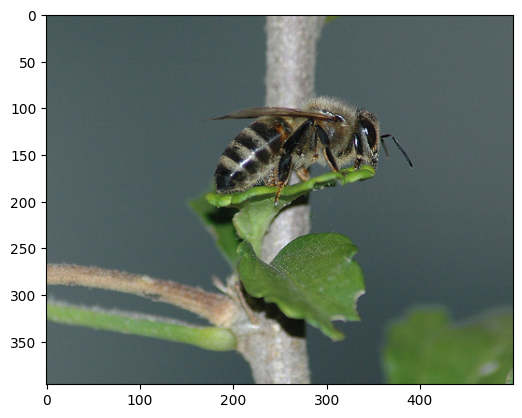

In [122]:
plt.imshow(test_img)

In [123]:
resized_test_img=tf.image.resize(test_img,(224,224))

In [124]:
pred_input=tf.expand_dims(resized_test_img,0)
pred=model.predict(pred_input)

1/1 [==============================] - 0s 149ms/step


In [125]:
argmax=tf.argmax(pred[0]).numpy()

In [126]:
label_map[argmax]

'bees'